In [1]:
import pandas as pd

In [99]:
df = pd.read_csv("../../Data/Crop_Recommendation.csv")
features = ['Nitrogen', 'Phosphorus','Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
columns = [(feature, 'mean') for feature in features]
means_df = df.groupby("Crop").describe()[columns]
means_df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
Banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
ChickPea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
Cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
Grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829


In [69]:
sorted_df = means_df.sort_values(by=("pH_Value", "mean"))
low_ph = sorted_df[sorted_df[("pH_Value", "mean")] < 6.03]
mid_ph = sorted_df[sorted_df[("pH_Value", "mean")] > 6.03]
mid_ph = mid_ph[mid_ph[("pH_Value","mean")] < 6.7]
mid_high_ph = sorted_df[sorted_df[("pH_Value", "mean")] > 6.7]
high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] > 6.9]
mid_high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] < 6.9]
ph_dfs = [low_ph,mid_ph,mid_high_ph, high_ph]

<ipython-input-69-785098d7f8f4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] > 6.9]
<ipython-input-69-785098d7f8f4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid_high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] < 6.9]


In [71]:
sorted_ph_dfs = []
for ph_df in ph_dfs:
    sorted_ph_dfs.append(ph_df.sort_values(by=("Nitrogen", "mean")))
sorted_ph_dfs

[            Nitrogen  pH_Value
                 mean      mean
 Crop                          
 Mango          20.07  5.766373
 PigeonPeas     20.73  5.794175
 KidneyBeans    20.75  5.749411
 Apple          20.80  5.929663
 Coconut        21.98  5.976562
 Grapes         23.18  6.025937
 Banana        100.23  5.983893,
             Nitrogen  pH_Value
                 mean      mean
 Crop                          
 Pomegranate    18.87  6.429172
 Maize          77.76  6.245190
 Rice           79.89  6.425471
 Watermelon     99.42  6.495778
 Muskmelon     100.32  6.358805,
           Nitrogen  pH_Value
               mean      mean
 Crop                        
 MungBean     20.99  6.723957
 MothBeans    21.44  6.831174
 Papaya       49.88  6.741442
 Jute         78.40  6.732778
 Coffee      101.20  6.790308,
           Nitrogen  pH_Value
               mean      mean
 Crop                        
 Lentil       18.77  6.927932
 Orange       19.58  7.016957
 Blackgram    40.02  7.133952
 

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11).fit_predict(means_df)
clusters = {}
for i in range(len(kmeans)):
    if kmeans[i] not in clusters:
        clusters[kmeans[i]] = [means_df.index[i]]
    else:
        clusters[kmeans[i]].append(means_df.index[i])
clusters

{6: ['Apple', 'KidneyBeans', 'Mango', 'PigeonPeas'],
 1: ['Banana', 'Muskmelon', 'Watermelon'],
 5: ['Blackgram', 'ChickPea'],
 7: ['Coconut', 'Grapes'],
 9: ['Coffee'],
 4: ['Cotton'],
 3: ['Jute', 'Maize'],
 8: ['Lentil', 'Orange', 'Pomegranate'],
 0: ['MothBeans', 'MungBean'],
 2: ['Papaya'],
 10: ['Rice']}

In [101]:

means_df[[idx in clusters[8] for idx in means_df.index]]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Lentil,18.77,68.36,19.41,24.509052,64.804785,6.927932,45.680454
Orange,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969
Pomegranate,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442


In [105]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13).fit_predict(means_df)
clusters = {}
for i in range(len(kmeans)):
    if kmeans[i] not in clusters:
        clusters[kmeans[i]] = [means_df.index[i]]
    else:
        clusters[kmeans[i]].append(means_df.index[i])
clusters

{2: ['Apple', 'Grapes'],
 10: ['Banana'],
 6: ['Blackgram', 'Lentil', 'MothBeans', 'MungBean'],
 0: ['ChickPea'],
 7: ['Coconut'],
 3: ['Coffee', 'Jute'],
 4: ['Cotton', 'Maize'],
 8: ['KidneyBeans', 'PigeonPeas'],
 1: ['Mango'],
 5: ['Muskmelon', 'Watermelon'],
 12: ['Orange', 'Pomegranate'],
 11: ['Papaya'],
 9: ['Rice']}

In [112]:
means_df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
Banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
ChickPea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
Cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
Grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829


C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


{2: ['Apple', 'Grapes'], 1: ['Banana', 'Cotton', 'Maize'], 3: ['Blackgram', 'ChickPea', 'KidneyBeans', 'Lentil', 'Mango', 'MothBeans', 'MungBean'], 0: ['Coconut', 'Orange', 'Papaya', 'PigeonPeas', 'Pomegranate'], 5: ['Coffee', 'Jute', 'Rice'], 4: ['Muskmelon', 'Watermelon']}


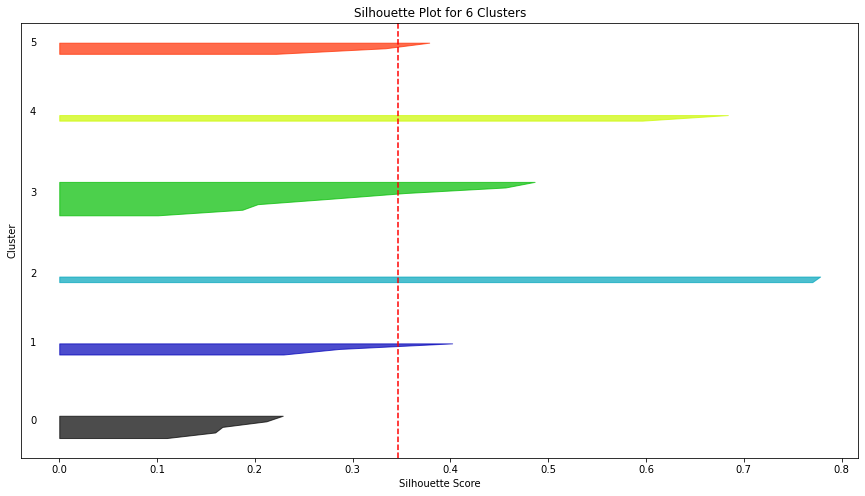

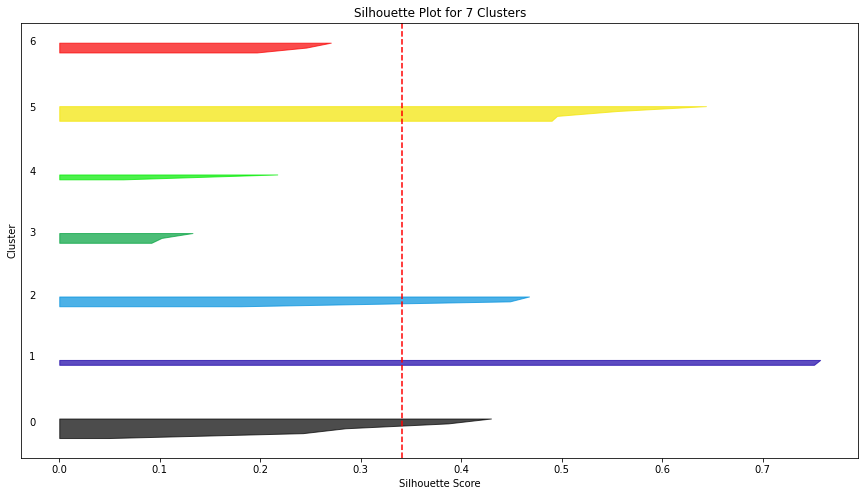

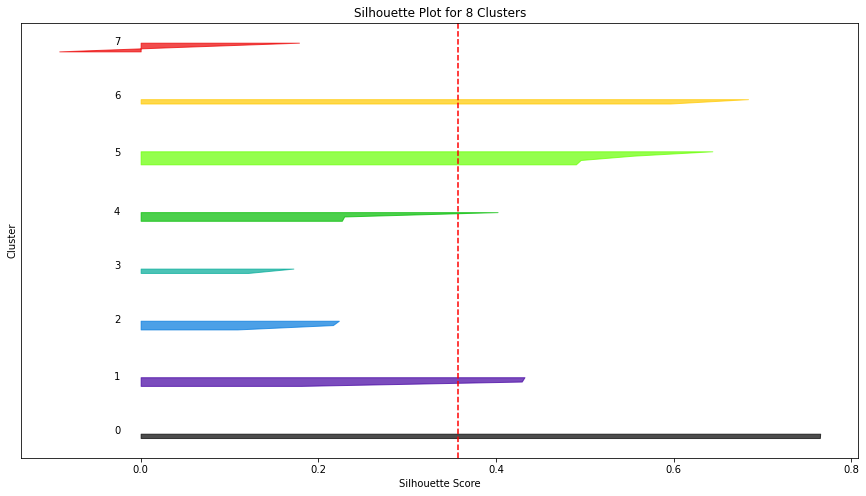

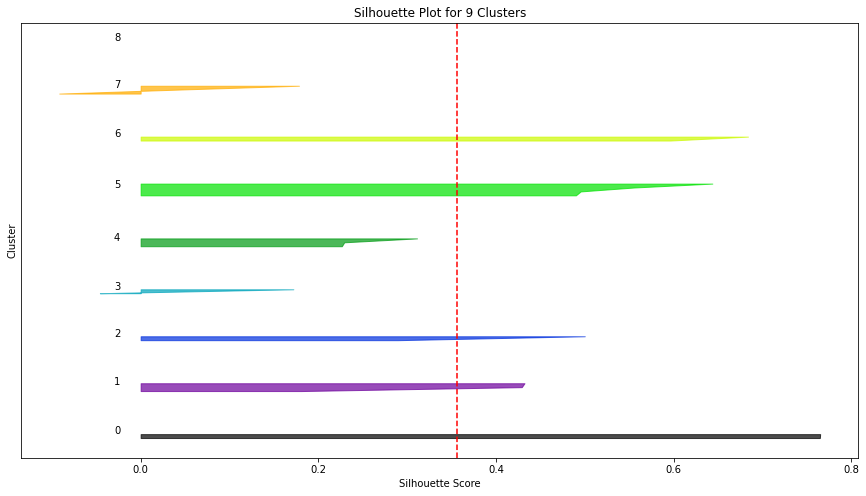

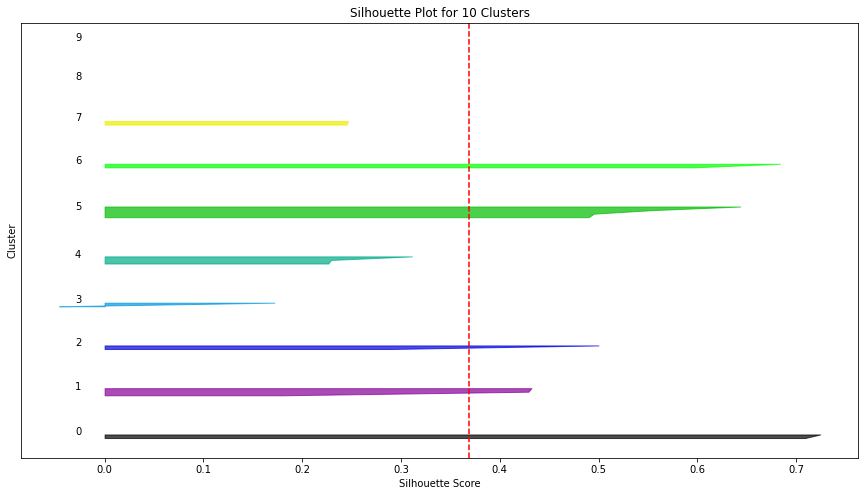

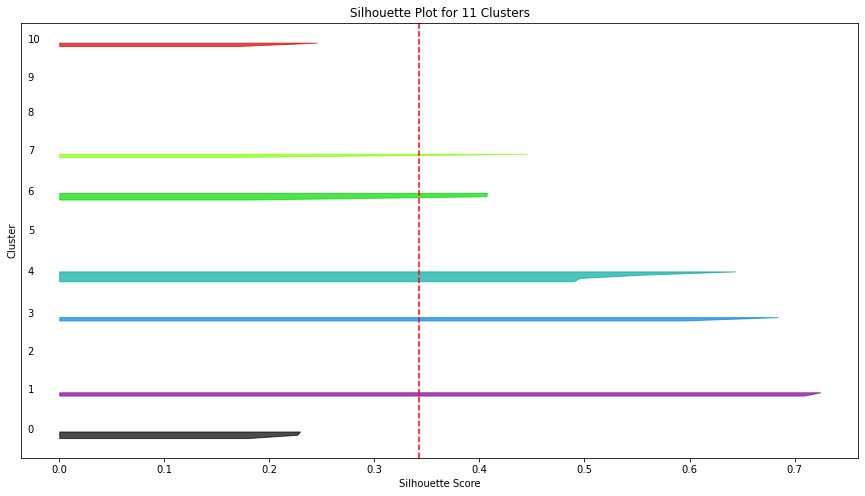

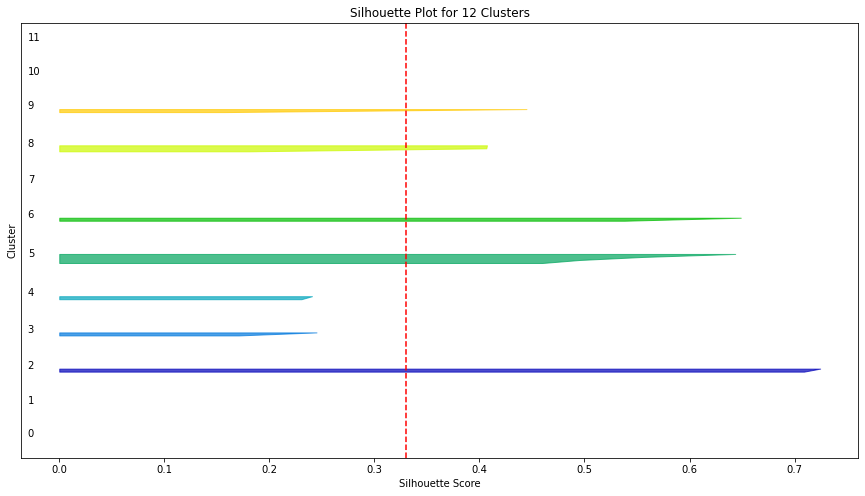

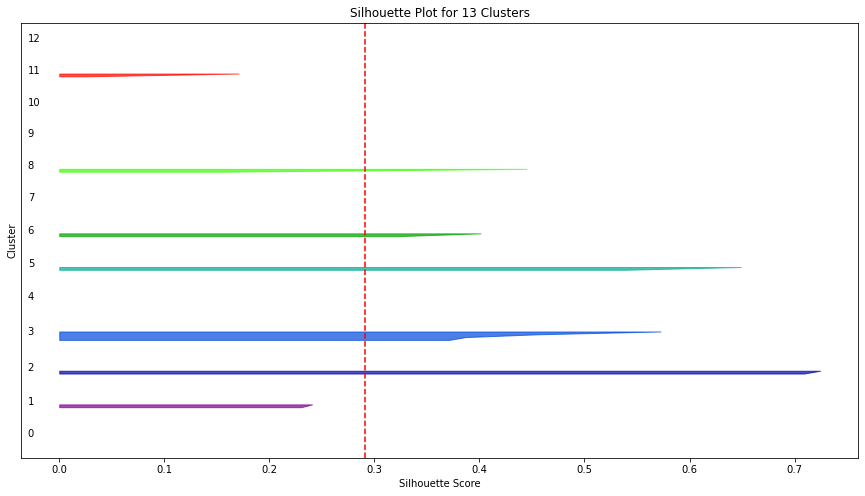

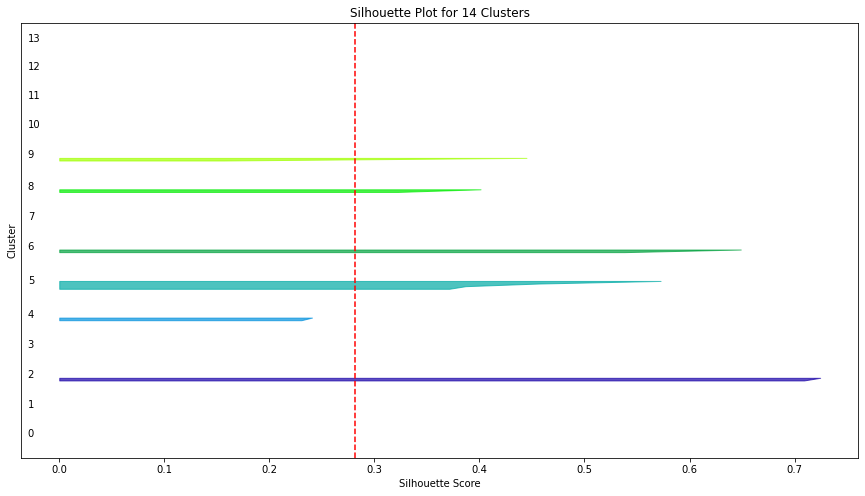

In [140]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
count = 0
X = means_df.reset_index()
X.drop(["Crop"], axis=1, inplace=True)
cs = []
for k in np.arange(6,15):
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    c = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    cs.append(c)
    silhouette_avg = silhouette_score(X, c)
    sample_silhouette_values = silhouette_samples(X, c)
    y_lower=10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[c == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Cluster')
    ax.set_title('Silhouette Plot for ' + str(k) + ' Clusters')
    
    ax.set_yticks([])
    
    count += 1
clusters = {}
c0 = cs[0]
for i in range(len(c0)):
    if c0[i] not in clusters:
        clusters[c0[i]] = [means_df.index[i]]
    else:
        clusters[c0[i]].append(means_df.index[i])
print(clusters)